<a href="https://colab.research.google.com/github/sumitgaurav25/python---practice/blob/main/10randomForestexercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()

In [9]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [11]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
df['target'] = iris.target
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [17]:
inputs = df.drop(['target', 'flower_name'], axis = "columns")
inputs

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
output = df.target

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs, output, test_size=0.2)

In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 10)

model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10)

In [21]:
model.predict(X_test)

array([1, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0,
       2, 0, 1, 2, 2, 1, 1, 2])

In [42]:
model.score(X_test, Y_test)

0.9666666666666667

In [44]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)

cm = confusion_matrix(Y_test, y_predicted)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]])

Text(95.72222222222221, 0.5, 'Truth')

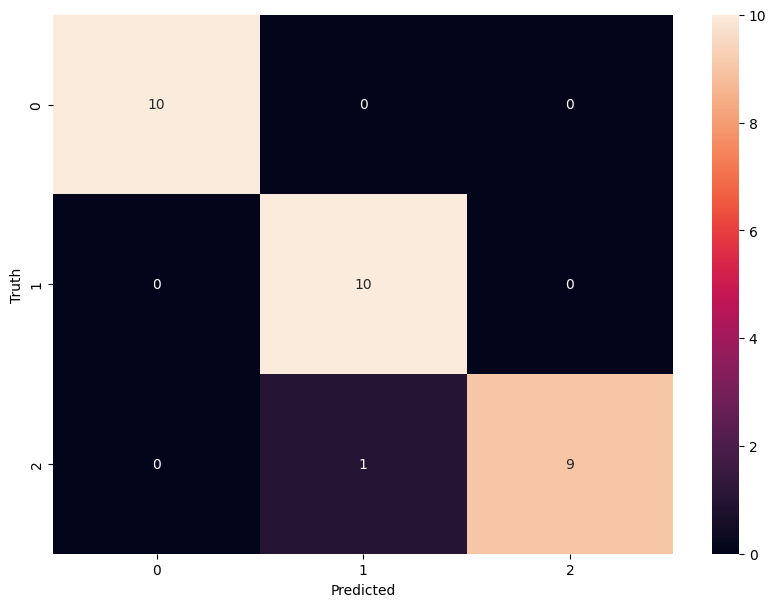

In [45]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')